### Taller práctico 1
# Estudio de asteroides con los datos JPL-NASA
Septiembre 2021
#### Campaña boliviana de búsqueda de asteroides (ABASC) 

### 1. Instrucciones

#### Manejar las celdas
Para correr una celda debe hacer clic en la misma y luego presionar `SHIFT + ENTER`. A continuación un ejemplo

In [1]:
print("Ahora puedo correr celdas")

Ahora puedo correr celdas


--------------------------

# 1. Base de datos

La base de datos [JPL Small-Body Database Search Engine](https://ssd.jpl.nasa.gov/sbdb_query.cgi) proporciona información sobre asteroides. Es posible realizar una selección de los mismos y descargar los resultados en formato CSV (comma separated value).

Para nuestro estudio del día de hoy se descargó una base de datos, la cual contiene a los asteroides que tienen un diámetro DEFINIDO. Los resultados se almacenan en `data.csv`.

Para cargar la base de datos usaremos la librería `pandas`, además cargaremos la librería `matplotlib` para realizar gráficos más adelante.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
print("Librerías cargadas")

Librerías cargadas


Ahora que tenemos la librería cargada, podemos cargar la base de datos. Además podemos saber la longitud de la misma (cuántos asteroides contiene), para esto corremos el siguiente código:

In [3]:
data = pd.read_csv("data.csv")
print("Base de datos cargada")
print(len(data["a"]),"asteroides")

Base de datos cargada
139837 asteroides


Ahora nos preguntamos ¿qué columnas contiene mi base de datos? Podemos saber esto utilizando el método `data.columns`

In [4]:
print(data.columns)

Index(['full_name', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc',
       'H', 'diameter', 'neo', 'pha'],
      dtype='object')


No es muy intuitivo, queremos saber qué información contiene cada columna. Lo bueno es que este trabajo ya está realizado y las columnas son.

| Columna | Parámetro | Descripción                                                             |
|---------|-----------|-------------------------------------------------------------------------|
| 1       | Full name | Nombre completo del objeto / Designación                                |
| 2       | a         | Semi eje mayor (UA)                                                     |
| 3       | e         | Excentricidad                                                           |
| 4       | i         | Inclinación, en grados, respecto al plano eclíptico (órbita tierra-sol) |
| 5       | node      | Longitud del nodo ascendente (grados)                                   |
| 6       | peri      | Argumento de perihelio (grados)                                         |
| 7       | q         | Perihelio (UA)                                                          |
| 8       | Q         | Afelio (UA)                                                             |
| 9       | period    | Periodo sidéreo orbital (años)                                          |
| 10      | data-arc  | Número de días abarcados por los datos                                          |
| 11      | H         | Magnitud absoluta                                                       |
| 12      | diameter  | Diámetro del asteroide (km)                                                       |
| 13      | NEO       | Objeto cercano a la tierra NEO, (Y, yes/N, no)                          |
| 14      | PHA       | Asteroide potencialmente peligroso (Y, yes/ N, no)                      |

Ahora sabemos qué información contiene la base de datos. Podemos ver las primeras filas de nuestra base de datos compilando el código:

In [5]:
data.head()

,full_name,a,e,i,om,w,q,ad,per_y,data_arc,H,diameter,neo,pha
0,1 Ceres (A801 AA),2.765655,0.078392,10.588196,80.267638,73.738268,2.548850,2.982461,4.599443,9520.0,3.53,939.400,N,N
1,2 Pallas (A802 FA),2.773815,0.229758,34.897780,172.920179,310.436861,2.136507,3.411122,4.619813,79216.0,4.22,545.000,N,N
2,3 Juno (A804 RA),2.668143,0.256967,12.991486,169.852230,247.999240,1.982519,3.353766,4.358347,79188.0,5.28,246.596,N,N
3,4 Vesta (A807 FA),2.361659,0.088351,7.141541,103.806059,151.015603,2.153004,2.570315,3.629394,25743.0,3.31,525.400,N,N
4,5 Astraea (A845 XA),2.573909,0.190621,5.367587,141.570820,358.659149,2.083269,3.064549,4.129505,64123.0,6.99,106.699,N,N


¿Qué podemos ver en estas primeras filas?

--------------------------------------

# 2. Histogramas 

### 2.1. LANZAMIENTO DE UN DADO

Un histograma es una representación gráfica de una variable en forma de barras, donde la superficie de cada barra es proporcional a la frecuencia de los valores representados.

Tomemos un ejemplo sencillo, si lanzamos un dado $n = 100$ veces, se espera que la cantidad de veces que sale 1, 2, 3, 4, 5 y 6 sea aproximadamente la misma.
Podemos hacer un "lanzador" de dados en python utilizando valores aleatorios.

Para lanzar un dado, corremos el siguiente código, si queremos lanzarlo otra vez podemos correrlo varias veces

In [6]:
import random
print(random.randint(1,6))

1


Anotar cada dato hasta lanzar 100 veces sería largo, por lo que el siguiente código crea una lista con $n$ lanzamientos. Podemos modificar $n$ y cambiar el número de lanzamientos. Por ejemplo, pueden cambiar de 100 a 200 tiros.

Como no es práctico mostrar 100 valores (y mucho menos 200) podemos ver los primeros datos utilizando la segunda parte del código, donde $m$ son la cantidad de valores que queremos imprimir.

In [7]:
n = 100             # número de lanzamientos
lista = []
for i in range(n):
    lanzamiento = random.randint(1,6)
    lista.append(lanzamiento)
    
### MOSTRAR LOS PRIMEROS M VALORES
m = 8               # cantidad de valores a mostrar
print(lista[0:m])

[3, 4, 3, 2, 1, 2, 2, 1]


Podemos notar que cada vez que corremos la celda los valores cambian, y es que estamos lanzando el dado 100 veces de nuevo.

Ahora queremos saber qué valor salió más veces, lo primero que podríamos hacer es ver los 100 o 200 datos y contar cuántos cincos o cuántos 3 tenemos, pero esto no es práctico y la solución son los histogramas.

Creamos un pequeño código que hace más facil crear un histograma. Sólo debes correr la celda y luego explicaremos el uso

In [8]:
def histograma(datos, bins = 0, limites = 0):
    if bins != 0:
        plt.hist(datos, bins = bins)
    else:
        plt.hist(datos)
    if limites != 0:
        plt.xlim(limites[0],limites[1])
print("Función histograma creada")

Función histograma creada


La función que creamos funciona de la siguiente manera: `histograma(datos a graficar, cantidad de bins, límites (lista))`

- `datos` es una lista de valores (en nuestro caso la lista se llama lista)
- `bins` es un número entero entre los cuales se grafica, se divide a los datos en esa cantidad de categorías (Opcional)
- `limites` es una lista de la forma `[xmin, xmax, ymin, ymax]` para cortar el gráfico (Opcional)
    
Los parámetros opcionales pueden no ser incluidos, y el código tomará su decisión para definir estos parámetros.
Haciendo el ejemplo de nuestros 100 lanzamientos de datos:

- `datos = lista`
- `bins = 6` los 6 valores que toma el dado
- `límites` no queremos cortar el gráfico, por lo que no lo incluimos

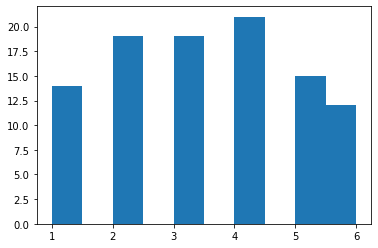

In [9]:
histograma(datos = lista)

NOTA: Las barras se alinean automáticamente, por lo que la barra de $6$ se alinea hacia la izquierda.

¿Qué pueden ver en el gráfico? ¿Podemos lanzar otra vez los dados y tener un distinto gráfico?

## 2.2. HISTOGRAMA DE ASTEROIDES SEGÚN SU SEMI EJE MAYOR $a$

Ahora que sabemos cómo interpretar un histograma realizaremos uno con nuestra base de datos. Tomaremos los valores de la columna $a$, es decir, el semi eje mayor.

Para tomar una columna y almacenarla en la variable `semieje` corremos el siguiente código y podemos observar los primeros 5 elementos.

In [10]:
semieje = data["a"]
print(semieje[0:5]) #obsevar los 5 primeros elementos, se puede modificar

0    2.765655
1    2.773815
2    2.668143
3    2.361659
4    2.573909
Name: a, dtype: float64


El siguiente paso es realizar rápidamente un histograma con estos valores.

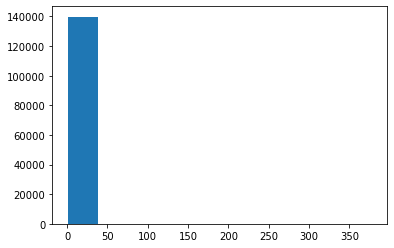

In [11]:
histograma(semieje)

Este gráfico no sirve de mucho, sólo nos informa que tenemos casi 140000 asteroides entre 0 y 50 UA.

Tenemos 2 problemas, el primero es la cantidad de bins. Se puede obtener la información sobre el gráfico asignando variables al mismo (este código no usa la función `histograma`, no es de preocuparse)

El gráfico se divide en 11 bins


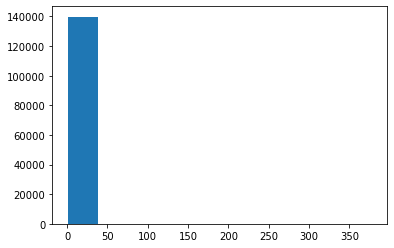

In [12]:
(n, bins, patches) = plt.hist(semieje)
print("El gráfico se divide en",len(bins), "bins")

Podemos cambiar la cantidad de bins para tener mejor información, esto hará que se divida a los datos en más segmentos y así podemos notar mejor la distribución

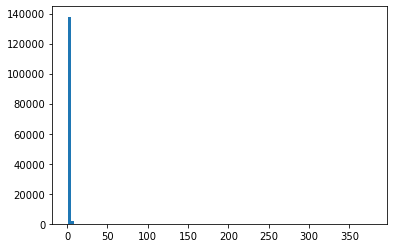

In [13]:
## CAMBIAR LA CANTIDAD DE BINS A UN MAYOR VALOR
histograma(semieje, bins = 100)

Aún nos queda la duda ¿por qué el gráfico va de 0 a 350 UA? Podemos explorar al asteroide más lejano (con máximo $a$) y el más cercano (con mínimo $a$). Así podemos tener una idea

In [14]:
print("Asteroide más cercano", min(semieje), "UA")
print("Asteroide más lejano", max(semieje), "UA")

Asteroide más cercano 0.6262098999601733 UA
Asteroide más lejano 378.1509431944011 UA


De aquí notamos que hay un asteroide que está a $378 UA$, y como seguramente son muy pocos, no aparecen en nuestro gráfico.

Para solucionar esto podemos cortar el gráfico, ahora usaremos un límite menor y mayor para cortar horizontalmente los semiejes.

Por ejemplo queremos que el gráfico vaya de 0 a 50 UA, entonces tendríamos
`limites = [0,50]`

El reto es cambiar estos parámetros (bins y límites) hasta que nuestro gráfico nos de mejor información.

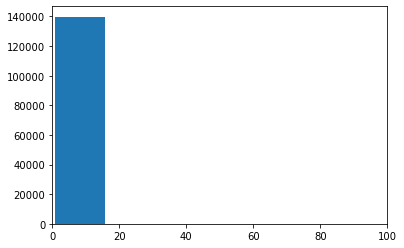

In [15]:
histograma(semieje, bins = 25, limites = [0,100])

Como seguramente notaron, para que el gráfico mejore tuvimos que subir mucho la cantidad de bins, y esto no es óptimo.

La segunda solución es cortar *los datos*, es decir sólo graficaremos los asteroides con un $a$ menor a un valor específico. Para esto usaremos una variable llamada `valor`, y el código corta los datos. Luego podemos ver qué asteroide es el más cercano y lejano.


In [16]:
valor = 10   ## tomaremos a los asteroides con semieje menor a ....
semieje2 = data[data["a"]<valor]["a"]
print("Asteroide más cercano", min(semieje2), "UA")
print("Asteroide más lejano", max(semieje2), "UA")

Asteroide más cercano 0.6262098999601733 UA
Asteroide más lejano 8.37438583617307 UA


Notamos que ahora el asteroide más lejano no sobrepasa el límite que ponemos, ahora podemos graficar sin la necesidad de cortar el gráfico (sin usar límite).

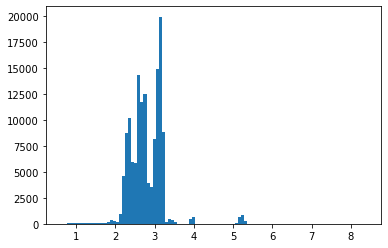

In [17]:
histograma(semieje2, bins = 100) #jugar con el valor de bins

Ahora podemos cambiar nuestro `valor` y también la cantidad de `bins`.

¿Qué podemos observar?¿Entre qué valores hay una mayor cantidad de asteroides?

**PROBLEMAS**

- P1. ¿Cuánto vale el semieje mayor del planeta Júpiter?¿Cuántos asteroides existen a esa distancia?
- P2. ¿Y para la tierra?
- P3. Podemos tener un gráfico más interesante sabiendo que hay muy pocos asteroides desde el sol hacia la tierra, abajo realiza un gráfico con estos límites

In [18]:
## SOLUCIÓN PREGUNTA 3


# 3. DIAGRAMA DE DISPERSIÓN: EXCENTRICIDAD Y PERIODO

Un histograma es bastante útil para representar la distribución de una variable, pero normalmente queremos conocer la relación entre dos (o hasta 3) variables. La herramienta que usaremos serán los diagramas de dispersión (o *scatterplot*).

Si conocemos acerca de un plano cartesiano conocemos casi todo sobre este diagrama. En pocas palabras toma un punto y representa una variable en cada coordenada. Para explicar mejor esto usaremos un ejemplo. Pero primero crearemos una función para hacer estos gráficos de forma más simple:

In [19]:
def dispersion(datosx, datosy, color = 0, limites = 0, tamaño = 0):
    if type(color) != int:
        if tamaño != 0:
            plt.scatter(datosx, datosy, c = color, s = tamaño, cmap = "hot")
        else:
            plt.scatter(datosx, datosy, c = color, cmap = "hot")
        plt.colorbar()
    else:
        if tamaño != 0:
            plt.scatter(datosx, datosy, s = tamaño)
        else:
            plt.scatter(datosx, datosy)
    if limites != 0:
        plt.xlim(limites[0],limites[1])
print("Función dispersión creada")

Función dispersión creada


La función que creamos funciona de la siguiente manera: `dispersion(datos en x, datos en y, color, limites, tamaño)`

- `datosx` es una lista de valores que serán graficados en el eje x
- `datosy` es una lista de valores que serán graficados en el eje y
- `tamaño` tamaño de los puntos, puede ser un valor fijo o una lista y los puntos tendrán el tamaño de cada valor en esa lista
- `color` color de los puntos, una lista para colorear los puntos acorde a su valor, será adjunto un mapa de color que explique este parámetro
- `limites` es una lista de la forma `[xmin, xmax]` para cortar el gráfico (Opcional)

Fuera de nuestra función, podemos añadir títulos a nuestros ejes para que el gráfico quede mejor estéticamente.

- `plt.xlabel("título x")`
- `plt.ylabel("título y")`

### 3.1. Ejemplo: Edad vs Altura en niños
Usaremos un pequeño ejemplo para ver cuánto crecen los niños en sus primeros 10 años. Crearemos un par de listas con la información. Es importante que ambas listas estén ordenadas, ya que el primer dato de la primera lista se relaciona con el primer dato de la segunda lista, y luego grafica ese punto en un plano cartesiano.

In [20]:
edades = [0, 0.5, 1, 1.5, 2, 2.5, 3, 4, 5, 6, 7, 8, 9, 10]
altura = [50.2, 68.3, 77, 83.5, 89, 92.9, 96.9, 104.6, 111, 117.5, 123.6, 129.7, 134.6, 140.1]
if len(edades) == len(altura): print("Las listas tienen el mismo largo")

Las listas tienen el mismo largo


Ahora podemos graficar nuestros valores, en el eje x pondremos las edades y en el eje y la altura

Text(0, 0.5, 'Altura (cm)')

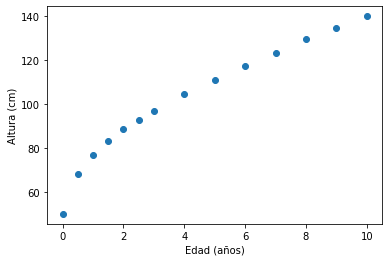

In [21]:
dispersion(datosx = edades, datosy = altura)
plt.xlabel("Edad (años)")
plt.ylabel("Altura (cm)")

¿Qué notamos? Por ejemplo podemos ver un crecimiento rápido hasta los 3 años y posteriormente hay un crecimiento casi lineal. Lo importante es que podemos generar un gráfico y éste relaciona a los valores de ambas listas.

## 3.2. Excentricidad y semieje
Ahora usaremos nuestra base de datos, graficaremos al semieje mayor del asteroide en el eje x, y la excentricidad en el eje y.

En principio no sería complicado, podemos graficar todo en la forma básica de nuestra función. Almacenamos nuestras listas en las variables `semieje` y `excentricidad`. (NOTA: Usamos a los asteroides con semieje mayor menor a 6).

Text(0, 0.5, 'Excentricidad')

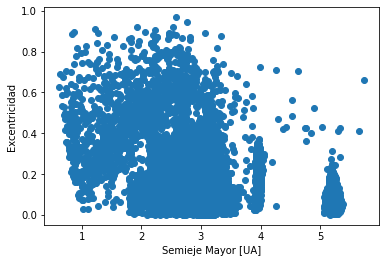

In [22]:
valor = 6      #límite para los semieje mayor
semieje = data[data["a"]<valor]["a"]
excentricidad = data[data["a"]<valor]["e"]
dispersion(datosx = semieje, datosy = excentricidad)
plt.xlabel("Semieje Mayor [UA]")
plt.ylabel("Excentricidad")

¡No vemos mucho! Los puntos son demasiado grandes

**RETO** Podemos regularlos añadiendo `tamaño = 3` a nuestra función. No olviden colocar los títulos a los ejes. Si lo desean pueden cambiar aún más el tamaño.

In [23]:
## SOLUCIÓN AL RETO

**PREGUNTAS**

- ¿Qué aprendemos? 
- ¿Podemos reconocer al cinturón principal de asteroides (se encuentra entre 2 y 3.3 UA)?
- ¿En qué regiones encontramos asteroides con mayor excentricidad?¿Y con menor excentricidad?

## 3.3. Excentricidad, semieje y tamaño
Ahora usaremos nuestra base de datos, graficaremos al semieje mayor del asteroide en el eje x, y la excentricidad en el eje y. PERO esta vez coloreamos los asteroides acorde a su tamaño (diámetro).

Almacenamos el diámetro de los asteroides en la variable `diametro`. 
(NOTA: Usamos a los asteroides con semieje mayor menor a 6).

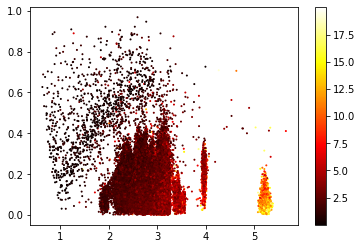

In [24]:
valor = 6
diametro_max = 20
data2 = data[(data["a"]<valor) & (data["diameter"]<diametro_max)]    # SELECCIONAMOS LOS DATOS CON LAS CONDICIONES
semieje = data2["a"]  #SEMIEJE
excentricidad = data2["e"] #EXCENTRICIDAD
diametro = data2["diameter"] #DIAMETRO
dispersion(datosx = semieje, datosy = excentricidad, color = diametro, tamaño = 1)

**PREGUNTAS**

- ¿Qué observamos? 
- ¿En qué regiones encontramos asteroides con mayor diámetro?¿Podemos relacionar este parámetro con su excentricidad?

## 3.3. Periodo y semieje mayor
Exploremos la tercera ley de Kepler, que relaciona al periodo (tiempo en el que un asteroide completa una órbita) con el semieje mayor. En pocas palabras la ley relaciona a estos parámetros como:
$$P^2 = a^3$$
Donde $P$ es el periodo y $a$ es el semieje mayor. 

Graficamos los datos y podemos observar que si están relacionadas:

Text(0, 0.5, 'Excentricidad')

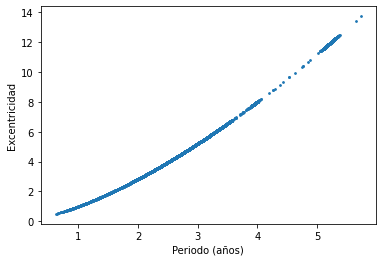

In [25]:
data3 = data[data["a"]<valor]
semieje = data3["a"]
periodo = data3["per_y"]
dispersion(datosx = semieje, datosy = periodo, tamaño = 3)
plt.xlabel("Periodo (años)")
plt.ylabel("Excentricidad")

**PREGUNTAS**

- ¿Qué observamos? 
- Podemos buscar el semi eje mayor de los planetas (Tierra, Marte, etc.) y encontrar su periodo.
- Podemos añadir el color a los asteroides (RETO)
- AVANZADO: ¿Cómo podemos linealizar el modelo? (Pista: Aplicando una función conocida)

In [26]:
## PREGUNTA 3

Para mejorar el modelo podemos calcular el logaritmo, así podemos encontrar una recta, es decir:

$$\text{log}(P)=k\text{log}(a)$$

Con $k$ una constante. Así tendremos un modelo lineal, para esto podemos calcular los logaritmos con la función `np.log()`.

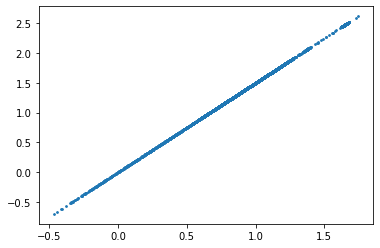

In [28]:
dispersion(datosx = np.log(semieje), datosy = np.log(periodo), tamaño = 3)

## 4. Asteroides peligrosos

Como vimos en nuestra base de datos, tenemos la columna para saber si un asteroide es considerado NEO (objeto cercano a la tierra) o PHA (asteroide potencialmente peligroso).

En el código no usamos la función `histograma`, ya que necesitamos algunos nuevos parámetros.

A continuación tenemos dos histogramas, el primero es sobre la distribución de asteroides por diámetro, y el segundo es la distribución en semieje mayor.

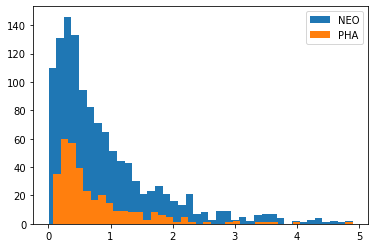

In [47]:
valor = 8
diametro_max = 5
data4 = data[(data["a"]<valor) & (data["diameter"]<5)]
neo = data4[data4["neo"] == "Y"]
pha = data4[data4["pha"] == "Y"]
plt.hist(neo["diameter"], bins = 40, label = "NEO")
plt.hist(pha["diameter"], bins = 40, label = "PHA")
plt.legend()
plt.xlabel("Diámetro (km)")
plt.ylabel("Conteo")

Text(0, 0.5, 'Conteo')

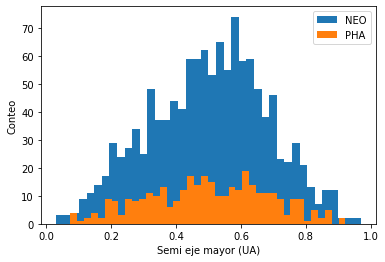

In [49]:
plt.hist(neo["e"], bins = 40, label = "NEO")
plt.hist(pha["e"], bins = 40, label = "PHA")
plt.legend()
plt.xlabel("Semi eje mayor (UA)")
plt.ylabel("Conteo")

-------------------
*ABASC 2021*